This code loads all the optIn and the optOut visits the crawler made into a dataframe and stores it into a pickle file.

In [1]:
from python.load_dataframe import load_dir
import pandas as pd

dir_optOut = "../data/final-data/opt-out/*.json"
dir_optIn = "../data/final-data/opt-in/*.json"

ignore_columns = ['testStarted', 'testFinished', 'timeout', 'screenshots', 'close']

df_optIn = load_dir(dir_optIn, ignore_columns)
df_optIn['autoconsent_action'] = 'optIn'
df_optOut = load_dir(dir_optOut, ignore_columns)
df_optOut['autoconsent_action'] = 'optOut'

df = pd.concat([df_optIn, df_optOut])
df.to_pickle('data/visits.pkl')

display(df)

,initialUrl,finalUrl,cmps,requests,cookies,apis,targets,autoconsent_action
0,http://tradplusad.com/,https://www.tradplusad.com/,cmps failed,"[{'url': 'http://tradplusad.com/', 'method': '...","[{'name': 'invite_query', 'domain': '.tradplus...","{'callStats': {}, 'savedCalls': []}","[{'type': 'page', 'url': 'http://tradplusad.co...",optIn
1,http://alexa.com/,https://alexa.com/,no cmps found,"[{'url': 'http://alexa.com/', 'method': 'GET',...",[],"{'callStats': {}, 'savedCalls': []}","[{'type': 'page', 'url': 'http://alexa.com/'}]",optIn
2,http://bstatic.com/,https://www.booking.com/index.en-gb.html?label...,succeeded,"[{'url': 'http://bstatic.com/', 'method': 'GET...","[{'name': 'X-AB', 'domain': 'sc-static.net', '...",{'callStats': {'https://cf.bstatic.com/static/...,"[{'type': 'page', 'url': 'http://bstatic.com/'...",optIn
3,http://aniwatch.to/,https://aniwatch.to/,no cmps found,"[{'url': 'http://aniwatch.to/', 'method': 'GET...","[{'name': '_ga', 'domain': '.aniwatch.to', 'pa...",{'callStats': {'https://www.googletagmanager.c...,"[{'type': 'page', 'url': 'http://aniwatch.to/'...",optIn
4,http://poste.it/,http://poste.it/,succeeded,"[{'url': 'http://poste.it/', 'method': 'GET', ...","[{'name': 'demdex', 'domain': '.demdex.net', '...","{'callStats': {}, 'savedCalls': []}","[{'type': 'page', 'url': 'http://poste.it/'}]",optIn
...,...,...,...,...,...,...,...,...
7591,http://gama.ir/,https://gama.ir/,no cmps found,"[{'url': 'http://gama.ir/', 'method': 'GET', '...","[{'name': 'gama_sessions', 'domain': 'gama.ir'...",{'callStats': {'https://www.googletagmanager.c...,"[{'type': 'page', 'url': 'http://gama.ir/'}, {...",optOut
7592,http://xxxindianporn.org/,https://xxxindianporn.org/,no cmps found,"[{'url': 'http://xxxindianporn.org/', 'method'...","[{'name': '__uvt', 'domain': '.realsrv.com', '...","{'callStats': {}, 'savedCalls': []}","[{'type': 'page', 'url': 'http://xxxindianporn...",optOut
7593,http://qortex.ai/,https://www.qortex.ai/,no cmps found,"[{'url': 'http://qortex.ai/', 'method': 'GET',...","[{'name': '__cf_bm', 'domain': '.vimeo.com', '...",{'callStats': {'https://www.googletagmanager.c...,"[{'type': 'page', 'url': 'http://qortex.ai/'}]",optOut
7594,http://sothebys.com/,https://www.sothebys.com/en/,no cmps found,"[{'url': 'http://sothebys.com/', 'method': 'GE...","[{'name': 'test_cookie', 'domain': '.doublecli...","{'callStats': {}, 'savedCalls': []}","[{'type': 'page', 'url': 'http://sothebys.com/'}]",optOut


These two pie charts show the success rates for cookie consent policy for both the optIn and the optOut consent modes.

<Axes: title={'center': 'optIn'}, ylabel='count'>

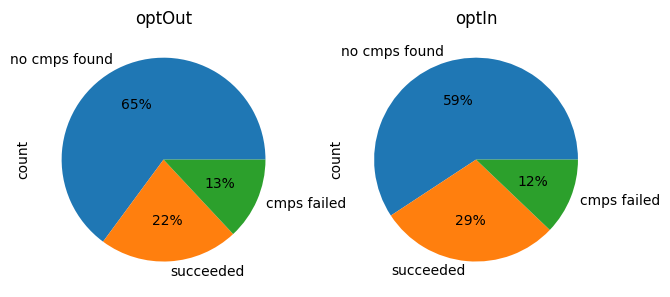

In [2]:

import matplotlib.pyplot as plt
fig, axis = plt.subplots(1, 2)
fig.tight_layout()

df_optOut.cmps.value_counts().plot(kind='pie', autopct='%.0f%%', title='optOut', ax=axis[0])
df_optIn.cmps.value_counts().plot(kind='pie', autopct='%.0f%%', title='optIn', ax=axis[1])

The following graph shows the crawler's successful website visits for both the optIn and the optOut consent modes. In addition to that it shows the intersection of both modes. The intersection of the dataframe is stored into a pickle file.

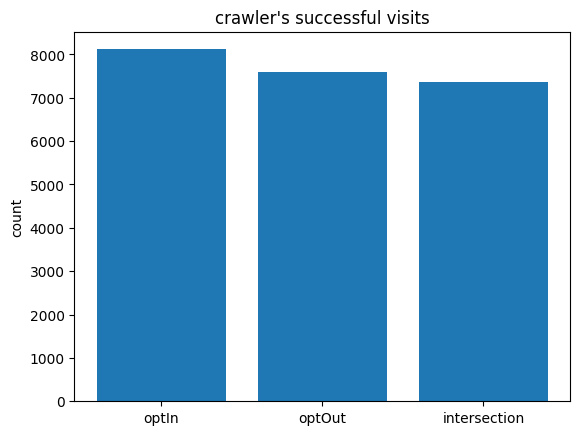

In [3]:
import numpy as np
val = np.intersect1d(df_optIn['initialUrl'], df_optOut['initialUrl'])
lengths = [len(df_optIn), len(df_optOut), len(val)]
labels = ['optIn', 'optOut', 'intersection']

df_intersection = df[df['initialUrl'].isin(val)]
df_intersection.to_pickle('data/intersection_of_visits.pkl')

plt.bar(labels, lengths)
plt.title('crawler\'s successful visits')
plt.ylabel('count')
plt.show()